In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df = df.drop('RowNumber',axis=1)
df = df.drop('CustomerId',axis=1)
df = df.drop('Surname',axis=1)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


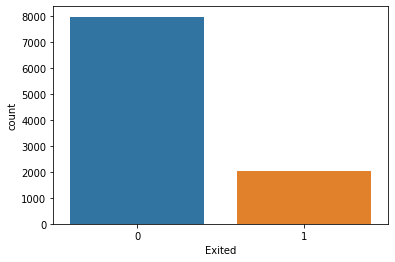

In [6]:
sns.countplot(x='Exited',data=df)

In [7]:
df.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [8]:
geography = pd.get_dummies(df['Geography'],drop_first=True)
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [9]:
df = pd.concat([df,geography,gender],axis = 1)
df = df.drop('Geography',axis=1)
df = df.drop('Gender',axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
Germany            10000 non-null uint8
Spain              10000 non-null uint8
Male               10000 non-null uint8
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


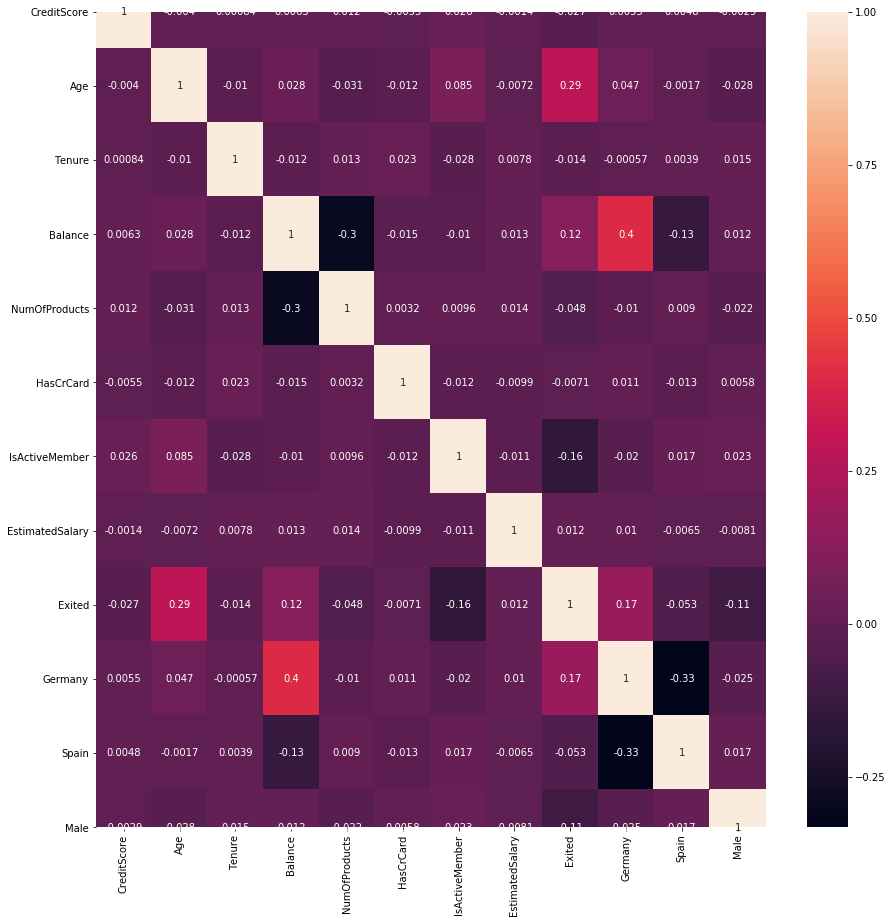

In [11]:
fig = plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),annot=True)

In [12]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [13]:
from sklearn.model_selection import train_test_split
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore        10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
Germany            10000 non-null uint8
Spain              10000 non-null uint8
Male               10000 non-null uint8
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9069,619,32,4,175406.13,2,1,1,172792.43,0,1,0
2603,643,34,7,160426.07,1,0,1,188533.11,1,0,0
7738,561,33,6,0.00,2,0,0,173680.39,0,0,1
1579,618,41,8,37702.79,1,1,1,195775.48,1,0,1
5058,714,37,9,148466.93,2,0,1,151280.96,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy')



In [19]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=124,
    epochs=400,
    validation_data=(X_test,y_test))


Epoch 1/400
57/57 [==============================] - 0s 6ms/step - loss: 0.7030 - val_loss: 0.6522
Epoch 2/400
57/57 [==============================] - 0s 2ms/step - loss: 0.6176 - val_loss: 0.5761
Epoch 3/400
57/57 [==============================] - 0s 2ms/step - loss: 0.5485 - val_loss: 0.5048
Epoch 4/400
57/57 [==============================] - 0s 2ms/step - loss: 0.5032 - val_loss: 0.4775
Epoch 5/400
57/57 [==============================] - 0s 2ms/step - loss: 0.4881 - val_loss: 0.4652
Epoch 6/400
57/57 [==============================] - 0s 3ms/step - loss: 0.4771 - val_loss: 0.4546
Epoch 7/400
57/57 [==============================] - 0s 3ms/step - loss: 0.4674 - val_loss: 0.4448
Epoch 8/400
57/57 [==============================] - 0s 4ms/step - loss: 0.4587 - val_loss: 0.4368
Epoch 9/400
57/57 [==============================] - 0s 4ms/step - loss: 0.4516 - val_loss: 0.4310
Epoch 10/400
57/57 [==============================] - 0s 3ms/step - loss: 0.4461 - val_loss: 0.4266
Epoch 11/

57/57 [==============================] - 0s 2ms/step - loss: 0.3417 - val_loss: 0.3395
Epoch 84/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3413 - val_loss: 0.3392
Epoch 85/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3408 - val_loss: 0.3382
Epoch 86/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3406 - val_loss: 0.3388
Epoch 87/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3405 - val_loss: 0.3397
Epoch 88/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3405 - val_loss: 0.3389
Epoch 89/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3402 - val_loss: 0.3383
Epoch 90/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3402 - val_loss: 0.3394
Epoch 91/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3403 - val_loss: 0.3383
Epoch 92/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3400 - val_loss: 0.3375
Epoch 93/400


57/57 [==============================] - 0s 2ms/step - loss: 0.3344 - val_loss: 0.3326
Epoch 165/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3343 - val_loss: 0.3329
Epoch 166/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3346 - val_loss: 0.3335
Epoch 167/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3341 - val_loss: 0.3335
Epoch 168/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3343 - val_loss: 0.3332
Epoch 169/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3344 - val_loss: 0.3333
Epoch 170/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3339 - val_loss: 0.3335
Epoch 171/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3350 - val_loss: 0.3363
Epoch 172/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3357 - val_loss: 0.3328
Epoch 173/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3340 - val_loss: 0.3325
Epoc

57/57 [==============================] - 0s 2ms/step - loss: 0.3325 - val_loss: 0.3342
Epoch 246/400
57/57 [==============================] - 0s 3ms/step - loss: 0.3320 - val_loss: 0.3362
Epoch 247/400
57/57 [==============================] - 0s 3ms/step - loss: 0.3319 - val_loss: 0.3350
Epoch 248/400
57/57 [==============================] - 0s 3ms/step - loss: 0.3331 - val_loss: 0.3341
Epoch 249/400
57/57 [==============================] - 0s 3ms/step - loss: 0.3328 - val_loss: 0.3360
Epoch 250/400
57/57 [==============================] - 0s 3ms/step - loss: 0.3325 - val_loss: 0.3335
Epoch 251/400
57/57 [==============================] - 0s 3ms/step - loss: 0.3318 - val_loss: 0.3353
Epoch 252/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3322 - val_loss: 0.3342
Epoch 253/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3317 - val_loss: 0.3342
Epoch 254/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3316 - val_loss: 0.3361
Epoc

57/57 [==============================] - 0s 2ms/step - loss: 0.3308 - val_loss: 0.3356
Epoch 327/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3306 - val_loss: 0.3371
Epoch 328/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3317 - val_loss: 0.3353
Epoch 329/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3308 - val_loss: 0.3349
Epoch 330/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3305 - val_loss: 0.3344
Epoch 331/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3306 - val_loss: 0.3348
Epoch 332/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3306 - val_loss: 0.3347
Epoch 333/400
57/57 [==============================] - 0s 2ms/step - loss: 0.3301 - val_loss: 0.3362
Epoch 334/400
57/57 [==============================] - 0s 3ms/step - loss: 0.3303 - val_loss: 0.3355
Epoch 335/400
57/57 [==============================] - 0s 3ms/step - loss: 0.3304 - val_loss: 0.3393
Epoc

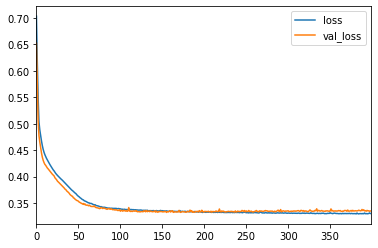

In [20]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [31]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
cm

array([[2326,   90],
       [ 299,  285]], dtype=int64)

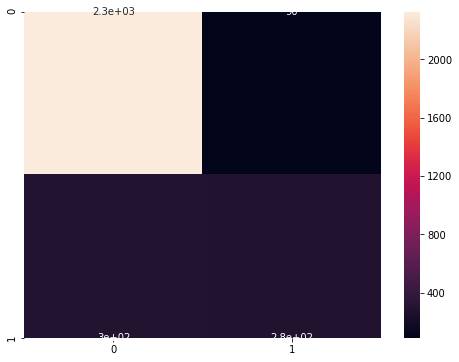

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True)

In [38]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2416
           1       0.76      0.49      0.59       584

    accuracy                           0.87      3000
   macro avg       0.82      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [48]:
def predict_exit(sample_value):
    sample_value = np.array(sample_value)
    sample_value = sample_value.reshape(1, -1)
    sample_value = scaler.transform(sample_value)
    return model.predict(sample_value)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred.round())
score*100

87.03333333333333

In [49]:
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
    print('Prediction: High change of exit!')
else:
    print('Prediction: Low change of exit.')

Prediction: Low change of exit.
